<a href="https://colab.research.google.com/github/yukta2106/ML-ANN-Experiments/blob/main/ML_Exp_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data generated: 300 samples, 2 features.


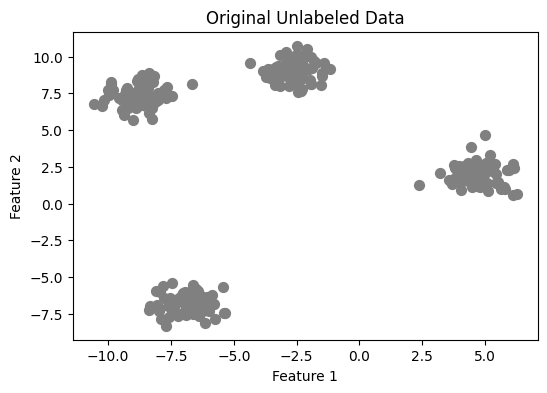

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.patches import Ellipse

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a synthetic dataset with 4 distinct 'blobs'
N_CLUSTERS = 4
X, y_true = make_blobs(n_samples=300, centers=N_CLUSTERS,
                       cluster_std=0.70, random_state=42)

print(f"Data generated: {X.shape[0]} samples, {X.shape[1]} features.")

# Initial visualization of the raw data (without labels)
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray')
plt.title("Original Unlabeled Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

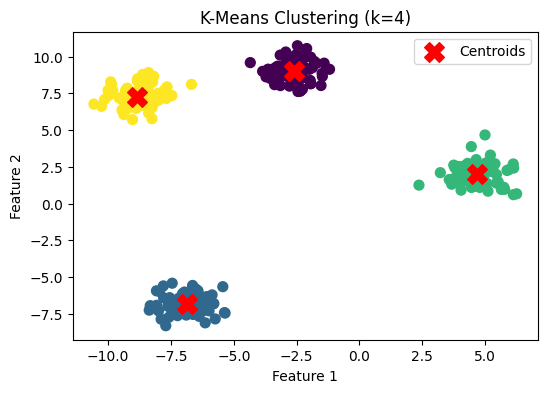

K-Means Centroids:
 [[-2.62116397  8.98922032]
 [-6.84653459 -6.84535312]
 [ 4.69470708  2.02120863]
 [-8.83393369  7.23110474]]
K-Means Inertia (Within-cluster Sum of Squares): 277.51796097746086


In [ ]:
## K-Means Clustering

# 1. Initialize and Fit the model
kmeans = KMeans(n_clusters=N_CLUSTERS, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X)
kmeans_labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# 2. Visualize the results
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title(f"K-Means Clustering (k={N_CLUSTERS})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

print("K-Means Centroids:\n", centroids)
print("K-Means Inertia (Within-cluster Sum of Squares):", kmeans.inertia_)

TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

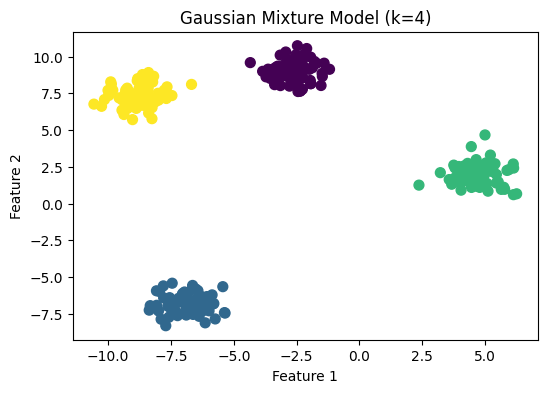

In [ ]:
## Gaussian Mixture Models (GMM)

# Helper function to draw ellipses (to visualize GMM components)
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

# 1. Initialize and Fit the model
gmm = GaussianMixture(n_components=N_CLUSTERS, random_state=42)
gmm.fit(X)
gmm_labels = gmm.predict(X)

# 2. Visualize the results
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, s=50, cmap='viridis')
plt.title(f"Gaussian Mixture Model (k={N_CLUSTERS})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Draw the ellipses for each component (cluster)
w_factor = 0.2 / gmm.weights_.max()
for i in range(N_CLUSTERS):
    draw_ellipse(gmm.means_[i], gmm.covariances_[i], alpha=0.2 * gmm.weights_[i] / gmm.weights_.max())

plt.show()
print("GMM means (similar to centroids):\n", gmm.means_)

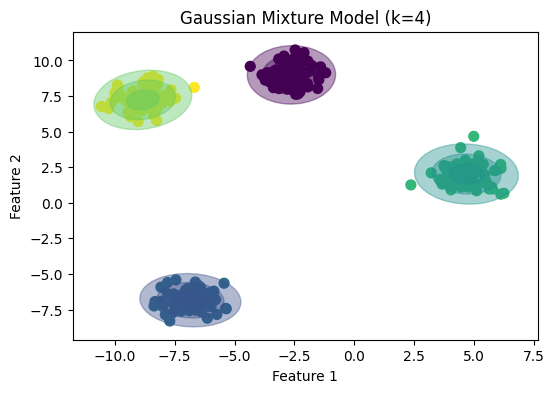

GMM means (similar to centroids):
 [[-2.62116397  8.98922032]
 [-6.84653459 -6.84535312]
 [ 4.69470708  2.02120863]
 [-8.83393369  7.23110474]]


In [ ]:
## Gaussian Mixture Models (GMM) - CORRECTED CODE

# Helper function to draw ellipses (to visualize GMM components)
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        # If the covariance is a single variance value (spherical)
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse: The position must be passed as (x, y)
    for nsig in range(1, 4):
        # FIX: Ensure Ellipse is called with (xy, width, height, angle, ...)
        ax.add_patch(Ellipse(xy=position,
                             width=nsig * width,
                             height=nsig * height,
                             angle=angle,
                             **kwargs))

N_CLUSTERS = 4 # Assuming you kept this from the data generation block
# Ensure X is available from the Data Generation block (X, y_true = make_blobs(...))

# 1. Initialize and Fit the model
gmm = GaussianMixture(n_components=N_CLUSTERS, random_state=42)
gmm.fit(X)
gmm_labels = gmm.predict(X)

# 2. Visualize the results
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, s=50, cmap='viridis')
plt.title(f"Gaussian Mixture Model (k={N_CLUSTERS})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Draw the ellipses for each component (cluster)
for i in range(N_CLUSTERS):
    # Scale the transparency of the ellipses based on the component's weight
    weight_alpha = gmm.weights_[i] / gmm.weights_.max() * 0.4

    draw_ellipse(gmm.means_[i], gmm.covariances_[i],
                 alpha=weight_alpha, color=plt.cm.viridis(i / N_CLUSTERS))

plt.show()
print("GMM means (similar to centroids):\n", gmm.means_)

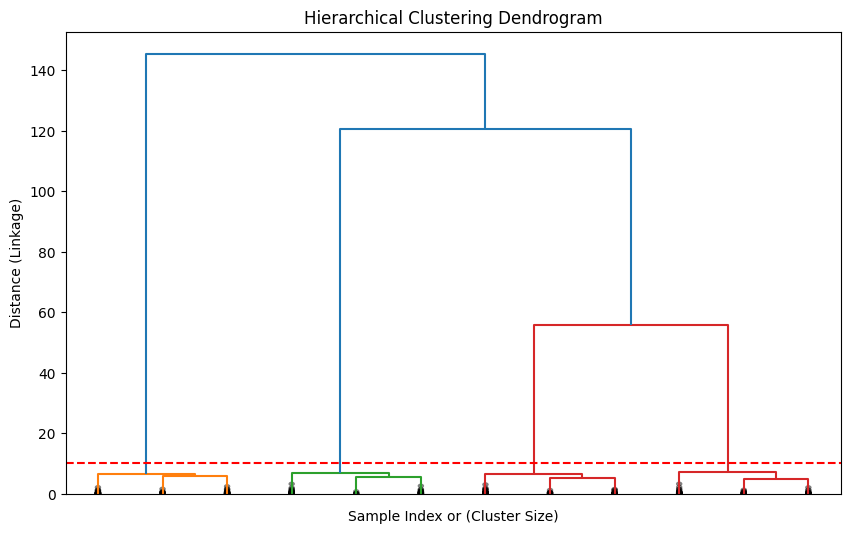

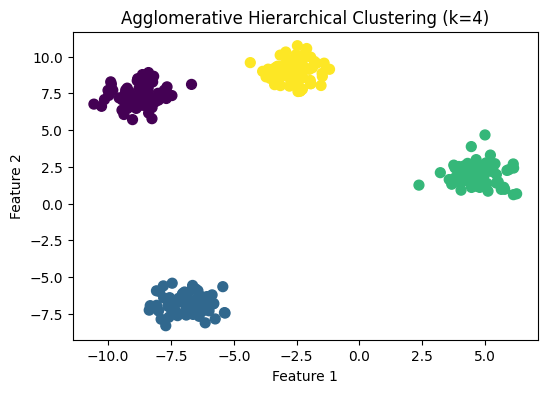

In [ ]:
## Hierarchical Clustering (Agglomerative)

# --- Part A: Dendrogram (Visualization of hierarchy) ---

# 1. Compute the linkage matrix
# 'ward' linkage minimizes the variance within each cluster
linked = linkage(X, 'ward')

# 2. Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(
    linked,
    orientation='top',
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,                   # show 12 merges
    show_leaf_counts=False,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance (Linkage)')
# Draw a horizontal line to suggest cutting at N_CLUSTERS
# NOTE: The height for the line is chosen visually/experimentally
plt.axhline(y=10, color='r', linestyle='--')
plt.show()

# --- Part B: Clustering and Visualization (after cutting the dendrogram) ---

# 1. Initialize and Fit the model
# We set n_clusters based on the desired cut in the dendrogram
agg_clustering = AgglomerativeClustering(n_clusters=N_CLUSTERS, linkage='ward')
agg_labels = agg_clustering.fit_predict(X)

# 2. Visualize the results
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, s=50, cmap='viridis')
plt.title(f"Agglomerative Hierarchical Clustering (k={N_CLUSTERS})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()